Red para intentar predecir precio, se usaron solo los datos numéricos del dataset del proyecto pasado

In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.8 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 3.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.8 MB/s eta 0:00:00:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 13.0 MB/s eta 0:00:00a 0:00:01
    

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


2023-04-26 20:33:23.521246: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-26 20:33:23.555021: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-26 20:33:23.555714: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 20:33:24.220582: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
#Dataset filename
#filename='airbnb_clean_F2M4_Postwor
filename='Dataset_conCentros.csv'

In [5]:
#Ruta al repo del archivo Github de Procesamiento de Datos con Python

Github_path = 'https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_ML/main/Datasets/'
#Github_path_image = 'https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_ML/main/images/'

file_path=Github_path+filename
#file_path_image=Github_path_image+imagename

print('Usando GithubPath: '+file_path)
#print('Usando GithubPath image: '+file_path_image)

Usando GithubPath: https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_ML/main/Datasets/Dataset_conCentros.csv


In [6]:
data=pd.read_csv(file_path)
data.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,n_days_lastrev,n_days_ashost,distanciaCentro
0,House,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0,1,3,1,NYC,"This is a comfortable, simple beautiful room, ...",...,Sunset Park,15,89,11232,1.0,1.0,50.0,2003,4200,10.621672
1,Apartment,3,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0,1,3,1,LA,Renovated clean & modern 1 bedroom in the hear...,...,Venice,12,98,90291,1.0,1.0,199.0,2430,3272,22.456674
2,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,1,3,1,NYC,My studio is located in the heart of Bensonhur...,...,Bensonhurst,26,94,11214,0.0,2.0,85.0,2057,2756,15.051423
3,Townhouse,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0,1,3,1,LA,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",...,San Gabriel,33,95,91776,1.0,2.0,70.0,2182,2559,13.751080
4,Condominium,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,3,1,Chicago,Located in the heart of the bustling Woodlawn/...,...,Woodlawn,60,88,60637,2.0,2.0,72.0,2192,2960,11.198063


In [5]:
df = pd.read_csv('/content/airbnb_clean_F2M4_Postwork7.csv')

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,n_days_lastrev,n_days_ashost
0,House,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0,1,3,1,NYC,"This is a comfortable, simple beautiful room, ...",...,AFFORDABLE & COZY IN SUNSET PARK T,Sunset Park,15,89,11232,1.0,1.0,50.0,2003,4200
1,Apartment,3,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0,1,3,1,LA,Renovated clean & modern 1 bedroom in the hear...,...,Luxurious and quiet - 30 second walk to the be...,Venice,12,98,90291,1.0,1.0,199.0,2430,3272
2,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,1,3,1,NYC,My studio is located in the heart of Bensonhur...,...,Bensonhurst STYLISH STUDIO,Bensonhurst,26,94,11214,0.0,2.0,85.0,2057,2756
3,Townhouse,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0,1,3,1,LA,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",...,LA San Gabriel Suit room 圣盖博大套房 免费停车 Free Par...,San Gabriel,33,95,91776,1.0,2.0,70.0,2182,2559
4,Condominium,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,3,1,Chicago,Located in the heart of the bustling Woodlawn/...,...,"XTRA Large 2bdrm 2bath in the City near ""El"" T...",Woodlawn,60,88,60637,2.0,2.0,72.0,2192,2960


In [9]:
df=data
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,n_days_lastrev,n_days_ashost,distanciaCentro
0,House,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0,1,3,1,NYC,"This is a comfortable, simple beautiful room, ...",...,Sunset Park,15,89,11232,1.0,1.0,50.0,2003,4200,10.621672
1,Apartment,3,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0,1,3,1,LA,Renovated clean & modern 1 bedroom in the hear...,...,Venice,12,98,90291,1.0,1.0,199.0,2430,3272,22.456674
2,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,1,3,1,NYC,My studio is located in the heart of Bensonhur...,...,Bensonhurst,26,94,11214,0.0,2.0,85.0,2057,2756,15.051423
3,Townhouse,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0,1,3,1,LA,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",...,San Gabriel,33,95,91776,1.0,2.0,70.0,2182,2559,13.751080
4,Condominium,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,3,1,Chicago,Located in the heart of the bustling Woodlawn/...,...,Woodlawn,60,88,60637,2.0,2.0,72.0,2192,2960,11.198063


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df['property_type'].unique()

array(['House', 'Apartment', 'Townhouse', 'Condominium', 'Villa', 'Loft',
       'Bed & Breakfast', 'Guesthouse', 'Other', 'Boutique hotel',
       'Bungalow', 'Cabin', 'Boat', 'Hostel', 'Camper/RV', 'Guest suite',
       'Dorm', 'Vacation home', 'In-law', 'Tent', 'Treehouse',
       'Timeshare', 'Castle', 'Yurt', 'Tipi', 'Earth House',
       'Serviced apartment', 'Hut', 'Island', 'Chalet', 'Train', 'Cave',
       'Lighthouse'], dtype=object)

In [11]:
df['city'] = le.fit_transform(df['city'])
df['property_type'] = le.fit_transform(df['property_type'])
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,n_days_lastrev,n_days_ashost,distanciaCentro
0,16,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0,1,3,1,4,"This is a comfortable, simple beautiful room, ...",...,Sunset Park,15,89,11232,1.0,1.0,50.0,2003,4200,10.621672
1,0,3,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0,1,3,1,3,Renovated clean & modern 1 bedroom in the hear...,...,Venice,12,98,90291,1.0,1.0,199.0,2430,3272,22.456674
2,0,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,1,3,1,4,My studio is located in the heart of Bensonhur...,...,Bensonhurst,26,94,11214,0.0,2.0,85.0,2057,2756,15.051423
3,27,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0,1,3,1,3,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",...,San Gabriel,33,95,91776,1.0,2.0,70.0,2182,2559,13.751080
4,10,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,3,1,1,Located in the heart of the bustling Woodlawn/...,...,Woodlawn,60,88,60637,2.0,2.0,72.0,2192,2960,11.198063


In [9]:
X = df.drop(columns=["price","amenities","bed_type","description","host_has_profile_pic","host_identity_verified","instant_bookable","latitude","longitude","name",
                     "neighbourhood","zipcode","n_days_lastrev","n_days_ashost"])
y = df["price"]

In [12]:
X = df.drop(columns=["price","amenities","bed_type","description","host_has_profile_pic","host_identity_verified","instant_bookable","name",
                     "neighbourhood","zipcode","n_days_lastrev","n_days_ashost"])
y = df["price"]

In [13]:
X.shape

(59288, 15)

In [14]:
X.head()

,property_type,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,distanciaCentro
0,16,2,2,0.0,3,1,4,100.0,40.650360,-74.003574,15,89,1.0,1.0,10.621672
1,0,3,2,1.0,3,1,3,0.0,33.987589,-118.474525,12,98,1.0,1.0,22.456674
2,0,3,4,1.0,3,1,4,80.0,40.602618,-73.993318,26,94,0.0,2.0,15.051423
3,27,2,3,1.0,3,1,3,100.0,34.072653,-118.096453,33,95,1.0,2.0,13.751080
4,10,3,5,2.0,3,1,1,100.0,41.781916,-87.606271,60,88,2.0,2.0,11.198063


In [15]:
l0 = tf.keras.layers.Dense(units=64, input_shape=([X.shape[1]]), activation="relu")
l1 = tf.keras.layers.Dense(units=32, activation="relu")
l2 = tf.keras.layers.Dense(units=1)

In [16]:
b_model = tf.keras.Sequential([l0,l1,l2])

2023-04-26 20:37:19.619169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-26 20:37:19.619675: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [17]:
b_model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(41501, 15) (17787, 15) (41501,) (17787,)


In [21]:
history = b_model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/1000
1168/1168 [==============================] - 1s 798us/step - loss: 22776.7188 - accuracy: 0.0000e+00 - val_loss: 18985.6934 - val_accuracy: 0.0000e+00
Epoch 2/1000
1168/1168 [==============================] - 1s 765us/step - loss: 17235.4238 - accuracy: 0.0000e+00 - val_loss: 17696.0684 - val_accuracy: 0.0000e+00
Epoch 3/1000
1168/1168 [==============================] - 1s 706us/step - loss: 16569.8926 - accuracy: 0.0000e+00 - val_loss: 17108.7363 - val_accuracy: 0.0000e+00
Epoch 4/1000
1168/1168 [==============================] - 1s 691us/step - loss: 16089.7461 - accuracy: 0.0000e+00 - val_loss: 16674.7754 - val_accuracy: 0.0000e+00
Epoch 5/1000
1168/1168 [==============================] - 1s 696us/step - loss: 15705.6191 - accuracy: 0.0000e+00 - val_loss: 16584.7363 - val_accuracy: 0.0000e+00
Epoch 6/1000
1168/1168 [==============================] - 1s 697us/step - loss: 15458.3867 - accuracy: 0.0000e+00 - val_loss: 16310.5176 - val_accuracy: 0.0000e+00
Epoch 7/1000
116

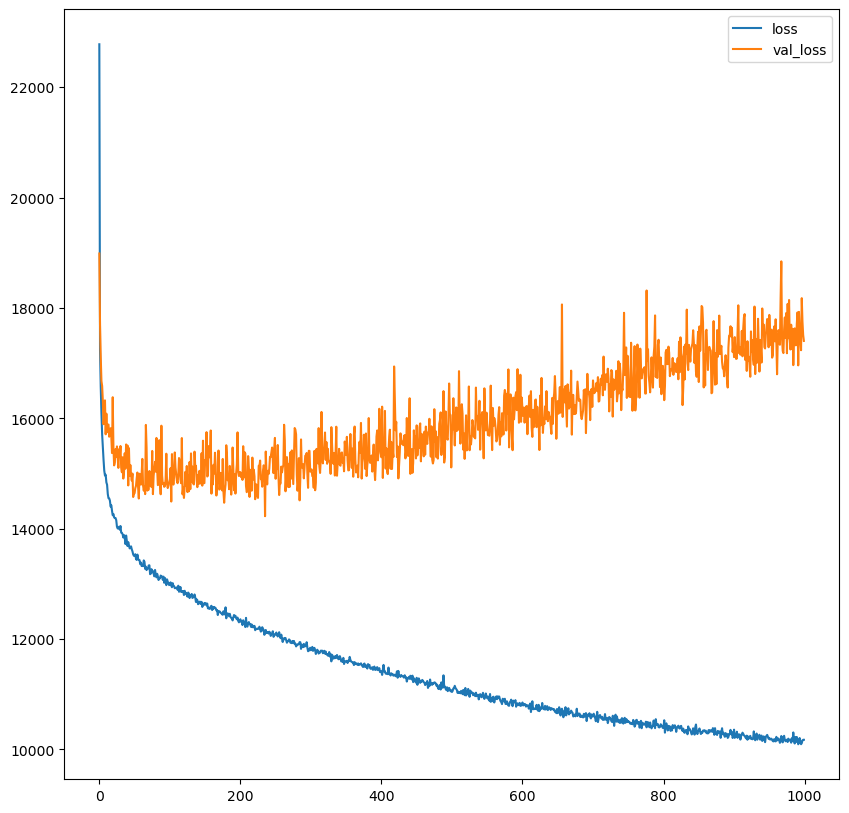

In [22]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

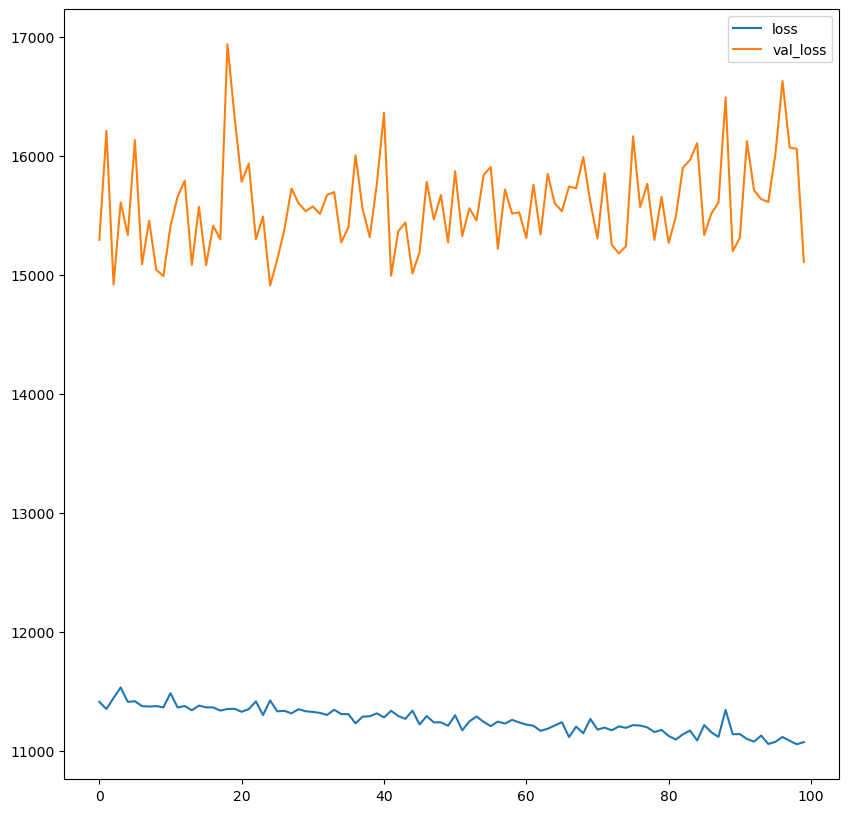

In [23]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"][400:500], label="loss")
plt.plot(history.history["val_loss"][400:500], label="val_loss")

plt.legend(loc="upper right")

In [24]:
y_pred = b_model.predict(X_test)

556/556 [==============================] - 0s 459us/step


In [25]:
b_model.evaluate(X_test, y_test)[:]

556/556 [==============================] - 0s 610us/step - loss: 16226.7979 - accuracy: 0.0000e+00


[16226.7978515625, 0.0]

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_test, y_pred)

0.4138336388982726